In [90]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from cartopy import crs
import cmaps
from matplotlib import cm, colors, ticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import pylab as pl

In [16]:
data_dir='/Users/hass877/Work/data_analysis/'
era_orig = xr.open_dataset(data_dir+'file2_e5.oper.an.pl.128_130_t.ll025sc.2009040100_2009040123.nc')
era_orig = era_orig.rename({'latitude':'lat','longitude':'lon'})
era_NA = xr.open_dataset(data_dir+'file2_e5.oper.an.pl.128_130_t.ll025sc.2009040100_2009040123_northamericax4v1pg2_721x1440.nc')
lat = era_orig['lat']
# Column mean T (K)
T_orig = era_orig['T'][0].mean(dim='level')
T_NA = era_NA['T'][0].mean(dim='level')
T_NA = T_NA.assign_coords(lat=lat)
T_diff = T_orig-T_NA

In [42]:
# Func to plot
def get_plot(T_orig, ax):
    pl=plt.pcolormesh(T_orig.lon,T_orig.lat,T_orig,\
                norm=colors.LogNorm(vmin=T_orig.min(),vmax=T_orig.max()),\
                    cmap=cmaps.WhiteBlueGreenYellowRed,transform=crs.PlateCarree(),shading='auto')
    ax.set_global()
    ax.coastlines()
    gl = ax.gridlines(draw_labels=True)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabels_top = gl.ylabels_right = False
    gl.xlines = gl.ylines = False
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}
    return pl
          
def get_plot_centred(T_orig, ax):
    pl=plt.pcolormesh(T_orig.lon,T_orig.lat,T_orig,\
                norm=colors.CenteredNorm(),\
                    cmap='RdBu_r',transform=crs.PlateCarree(),shading='auto')
    ax.set_global()
    ax.coastlines()
    gl = ax.gridlines(draw_labels=True)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabels_top = gl.ylabels_right = False
    gl.xlines = gl.ylines = False
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}
    return pl

(721, 1440)


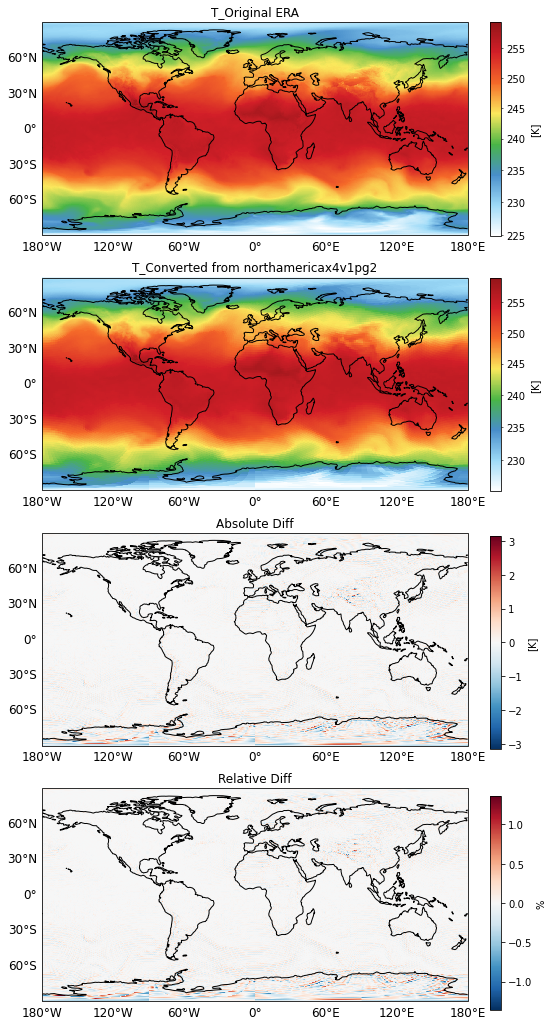

In [93]:
import warnings
warnings.filterwarnings("ignore")
T_rel = (T_diff/T_NA)*100
print((T_diff/T_NA).shape)
# T plots
plt.figure(figsize=(8,18))
#ax=plt.subplot(4,1,1)
ax=plt.subplot(411,projection=crs.PlateCarree())
pl=get_plot(T_orig, ax)
plt.title('T_Original ERA')
cax=plt.axes([0.92,0.715,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax, label='[K]')
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
ax=plt.subplot(412,projection=crs.PlateCarree())
pl=get_plot(T_NA, ax)
plt.title('T_Converted from northamericax4v1pg2')
cax=plt.axes([0.92,0.518,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax, label='[K]')
cbar.ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
ax=plt.subplot(413,projection=crs.PlateCarree())
pl=get_plot_centred(T_diff, ax)
plt.title('Absolute Diff')
cax=plt.axes([0.92,0.319,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax, label='[K]')
ax=plt.subplot(414,projection=crs.PlateCarree())
pl=get_plot_centred(T_rel, ax)
plt.title('Relative Diff')
cax=plt.axes([0.92,0.118,0.02,0.165])
cbar=plt.colorbar(pl, orientation='vertical', cax=cax, label='%')

In [14]:
# Checking out the global means
!cdo output -fldmean -selvar,T -seltime,0 file2_e5.oper.an.pl.128_130_t.ll025sc.2009040100_2009040123.nc

cdo(1) fldmean: Process started
cdo(2) selname: Process started
cdo(3) seltime: Process started
cdo(1) fldmean:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 910      261.496
      257.333
      249.512
      239.631
      233.865
      229.052
      221.414
      217.161
      210.948
      206.019
      204.821
      208.202
      211.989
      215.384
      218.674
      222.121
      225.675
       232.93
        240.2
      246.826
      252.681
      257.764
      262.193
      266.048
      269.599
       272.83
      275.688
      276.999
      278.233
      279.353
      280.385
      281.349
      282.369
      283.471
      284.658
      286.106
       287.74
cdo(3) seltime: Processed 38414881 values from 2 variables over 24 timesteps.
cdo(2) selname: Processed 38414880 values from 2 variables over 1 timestep.
cdo(1) fldme

In [15]:
!cdo output -fldmean -selvar,T -seltime,0 file2_e5.oper.an.pl.128_130_t.ll025sc.2009040100_2009040123_northamericax4v1pg2_721x1440.nc

cdo(1) fldmean: Process started
cdo(2) selname: Process started
cdo(3) seltime: Process started
      261.496
      257.333
      249.512
      239.631
      233.865
      229.052
      221.414
      217.161
      210.948
      206.019
      204.821
      208.202
      211.989
      215.384
      218.674
      222.121
      225.675
       232.93
        240.2
      246.826
      252.681
      257.764
      262.193
      266.048
      269.599
       272.83
      275.688
      276.999
      278.233
      279.353
      280.385
      281.349
      282.369
      283.471
      284.658
      286.106
       287.74
cdo(3) seltime: Processed 38415602 values from 3 variables over 24 timesteps.
cdo(2) selname: Processed 38414880 values from 3 variables over 1 timestep.
cdo(1) fldmean: Processed 38414880 values from 1 variable over 1 timestep.
cdo    output: Processed 37 values from 1 variable over 1 timestep [7.04s 344MB].
